#Problem 1

#Problem Statement:

A wholesale distributor operating in different regions of Portugal has information on the annual spending of several items in their stores across different regions and channels.

The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channels (Hotel, Retail).

Data dictionary:-
- Buyer/Spender : Buyer/Spender's id
- Channel : Sales channel- Hotel or Retail
- Region : Region of sales- Lisbon, Oporto, Other
- Fresh : Variety of products
- Milk : Variety of products
- Grocery : Variety of products
- Frozen : Variety of products
- Detergents_Paper : Variety of products
-  Delicatessen : Variety of products


In [1]:
#Importing Libraries
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

#Statistics
from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import StandardScaler

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Loading the dataset in dataframe df
df = pd.read_csv('Wholesale Customers Data.csv')

In [3]:
#Checking the first and last 5 values
df

Buyer/Spender Channel Region  Fresh   Milk  Grocery  Frozen  \
0                1  Retail  Other  12669   9656     7561     214   
1                2  Retail  Other   7057   9810     9568    1762   
2                3  Retail  Other   6353   8808     7684    2405   
3                4   Hotel  Other  13265   1196     4221    6404   
4                5  Retail  Other  22615   5410     7198    3915   
..             ...     ...    ...    ...    ...      ...     ...   
435            436   Hotel  Other  29703  12051    16027   13135   
436            437   Hotel  Other  39228   1431      764    4510   
437            438  Retail  Other  14531  15488    30243     437   
438            439   Hotel  Other  10290   1981     2232    1038   
439            440   Hotel  Other   2787   1698     2510      65   

     Detergents_Paper  Delicatessen  
0                2674          1338  
1                3293          1776  
2                3516          7844  
3                 507          1788  
4                1777          5185  
..                ...           ...  
435               182          2204  
436                93          2346  
437             14841          1867  
438               168          2125  
439               477            52  

[440 rows x 9 columns]

In [4]:
#Checking the dimentions of the data
df.shape

(440, 9)

- The dataset have 440 rows & 9 column

In [5]:
#Information about the dataset & datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


- There are 7 Integer and 2 Object data types
- All the data types are not null
- There seems to be no missing values

In [6]:
#Checking missing values
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

- From the above, it verifies that there are no null values in the dataset

1.1.1 Use methods of descriptive statistics to summarize data.

In [7]:
# Summary of the dats

df.describe(include='all')


Buyer/Spender Channel Region          Fresh          Milk  \
count      440.000000     440    440     440.000000    440.000000   
unique            NaN       2      3            NaN           NaN   
top               NaN   Hotel  Other            NaN           NaN   
freq              NaN     298    316            NaN           NaN   
mean       220.500000     NaN    NaN   12000.297727   5796.265909   
std        127.161315     NaN    NaN   12647.328865   7380.377175   
min          1.000000     NaN    NaN       3.000000     55.000000   
25%        110.750000     NaN    NaN    3127.750000   1533.000000   
50%        220.500000     NaN    NaN    8504.000000   3627.000000   
75%        330.250000     NaN    NaN   16933.750000   7190.250000   
max        440.000000     NaN    NaN  112151.000000  73498.000000   

             Grocery        Frozen  Detergents_Paper  Delicatessen  
count     440.000000    440.000000        440.000000    440.000000  
unique           NaN           NaN               NaN           NaN  
top              NaN           NaN               NaN           NaN  
freq             NaN           NaN               NaN           NaN  
mean     7951.277273   3071.931818       2881.493182   1524.870455  
std      9503.162829   4854.673333       4767.854448   2820.105937  
min         3.000000     25.000000          3.000000      3.000000  
25%      2153.000000    742.250000        256.750000    408.250000  
50%      4755.500000   1526.000000        816.500000    965.500000  
75%     10655.750000   3554.250000       3922.000000   1820.250000  
max     92780.000000  60869.000000      40827.000000  47943.000000

- The dataset contains 440 entries representing buyers or spenders.
- The majority of buyers are associated with the hotel channel.
- Most buyers come from the "Other" region.
- Average spending varies across different product categories.
- Fresh products have an average spending of approximately 12,000 units.
- Milk and grocery items have average spendings of around 5,800 and 7,950 units, respectively.
- The dataset shows a wide range of values with some extreme values in certain categories.
- These insights provide an understanding of spending behavior and an overview of the dataset.






1.1.2 Which Region and which Channel spent the most?

1.1.3 Which Region and which Channel spent the least?

In order to find the spend, we will create a new column for 'Total spend' , which will be sum of below :
Fresh, Milk,	Grocery,	Frozen,	Detergents_Paper,	Delicatessen

In [8]:
df['total_spend'] = df['Fresh'] + df['Milk'] + df['Grocery'] + df['Detergents_Paper']+ df['Delicatessen']

In [9]:
df.head(1)

Buyer/Spender Channel Region  Fresh  Milk  Grocery  Frozen  \
0              1  Retail  Other  12669  9656     7561     214   

   Detergents_Paper  Delicatessen  total_spend  
0              2674          1338        33898

We can see new Column added as 'total_spend'.
Let's check the Region & Channel wise most spent


In [10]:
#Total spending- Channel wise
df.groupby(["Channel"])['total_spend'].sum()

Channel
Hotel     6882590
Retail    6385260
Name: total_spend, dtype: int64

In [11]:
#Avg spending- Channel wise
df.groupby(["Channel"])['total_spend'].mean()

Channel
Hotel     23095.939597
Retail    44966.619718
Name: total_spend, dtype: float64

In [12]:
#Total spending- Region wise
df.groupby(["Region"])['total_spend'].sum()

Region
Lisbon    2155787
Oporto    1364956
Other     9747107
Name: total_spend, dtype: int64

In [14]:
#Avg spending- Region wise
df.groupby(["Region"])['total_spend'].mean()

Region
Lisbon    27997.233766
Oporto    29041.617021
Other     30845.275316
Name: total_spend, dtype: float64

Plotting the same using barplots

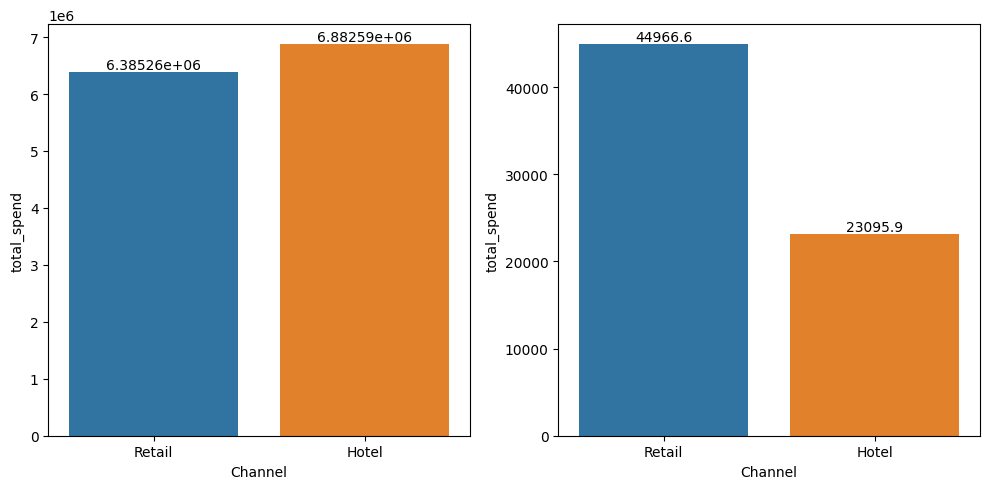

In [15]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
ax= sns.barplot(data=df, x ='Channel', y='total_spend', estimator = np.sum, ci=None)
for label in ax.containers:
    ax.bar_label(label)
plt.subplot(1, 2, 2)
ax1=sns.barplot(data=df, x ='Channel', y='total_spend', ci=None);
for label in ax1.containers:
    ax1.bar_label(label)
plt.tight_layout();

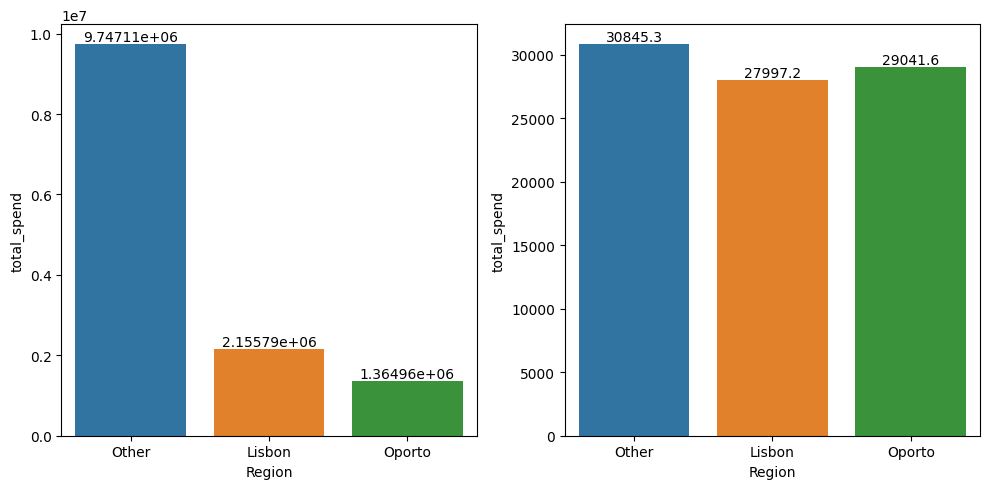

In [16]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
ax3= sns.barplot(data=df, x ='Region', y='total_spend', estimator = np.sum, ci=None)
for label in ax3.containers:
    ax3.bar_label(label)
plt.subplot(1, 2, 2)
ax4= sns.barplot(data=df, x ='Region', y='total_spend', ci=None)
for label in ax4.containers:
    ax4.bar_label(label)
plt.tight_layout();

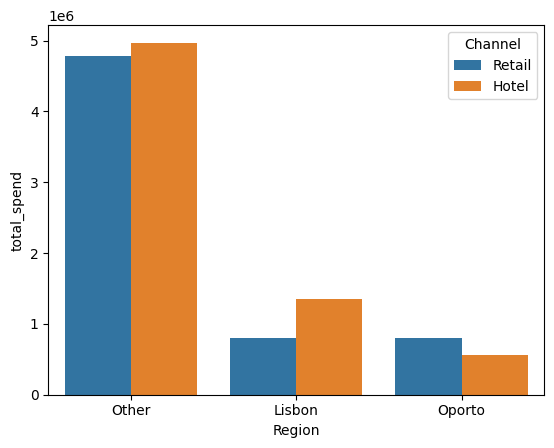

In [17]:
sns.barplot(data=df, x ='Region', y='total_spend', hue='Channel',estimator = np.sum, ci=None);

Among the two channels,

- The Hotel channel had the highest total spending, amounting to 6,882,590.
- On the other hand, the Retail channel had a relatively lower total spending of 6,385,260.
- However, when we check average spent, retailer spends more than hotel




Among the two resgions,

- The Other region has the highest total spending among the three, amounting to 9,747,107.
- The lowest is for the Oporto region having a total spending of 1,364,956.
- On an average all regions spend almost same Lisbon being the least




- Hotels, in general, spend more than retailers. However, in the Oporto region, retailers spend more than hotels.




1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

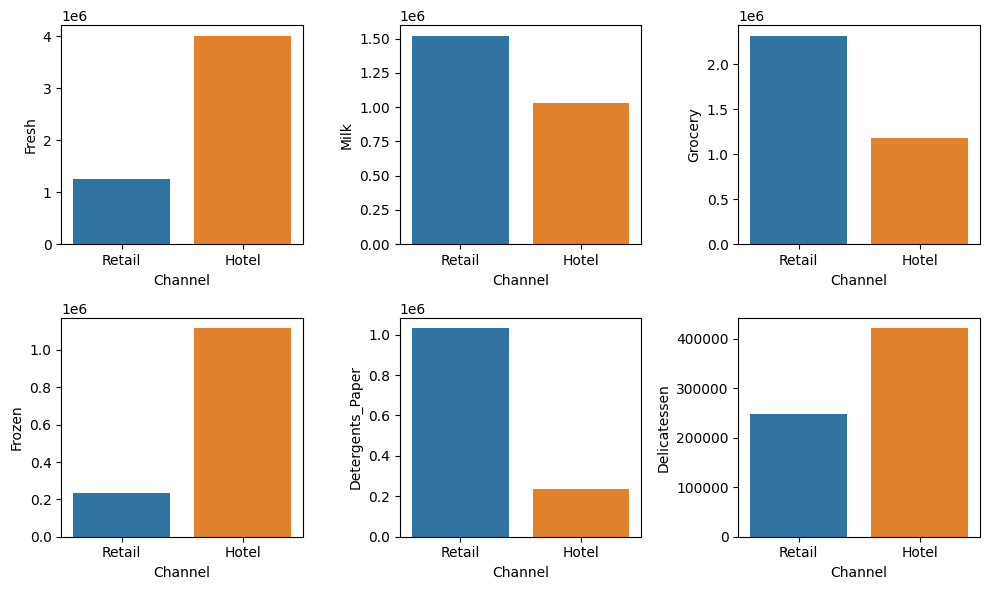

In [18]:

plt.figure(figsize=(10,6))
plt.subplot(2, 3, 1)
sns.barplot(data=df, x='Channel', y='Fresh',estimator = np.sum, ci=None)

plt.subplot(2, 3, 2)
sns.barplot(data=df, x='Channel', y='Milk',estimator = np.sum, ci=None)

plt.subplot(2, 3, 3)
sns.barplot(data=df, x='Channel', y='Grocery',estimator = np.sum, ci=None)

plt.subplot(2, 3, 4)
sns.barplot(data=df, x='Channel', y='Frozen',estimator = np.sum, ci=None)

plt.subplot(2, 3, 5)
sns.barplot(data=df, x='Channel', y='Detergents_Paper',estimator = np.sum,ci=None)

plt.subplot(2, 3, 6)
sns.barplot(data=df, x='Channel', y='Delicatessen', estimator = np.sum,ci=None)
plt.tight_layout();

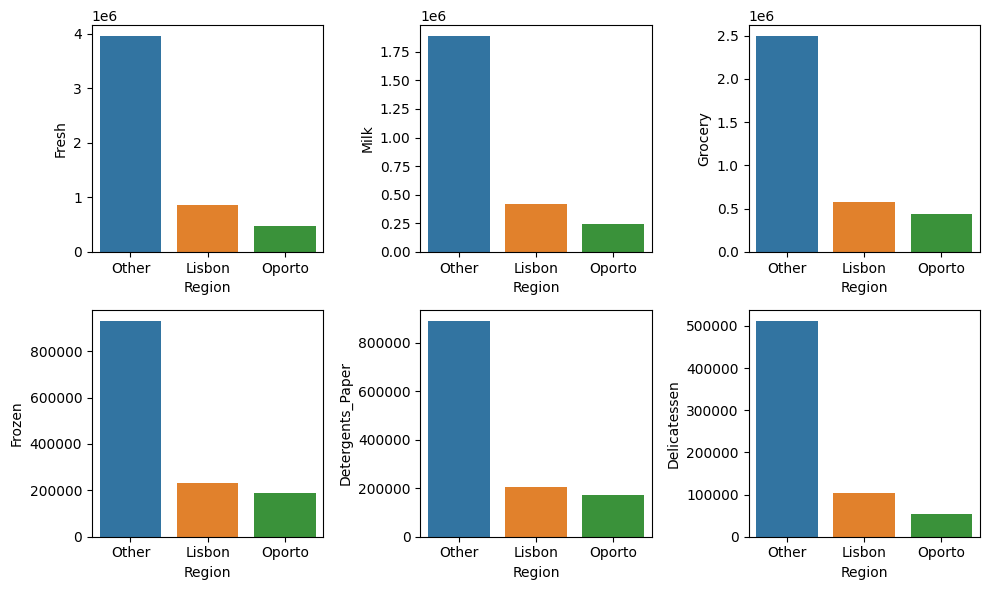

In [19]:
plt.figure(figsize=(10,6))
plt.subplot(2, 3, 1)
sns.barplot(data=df, x='Region', y='Fresh',estimator = np.sum, ci=None)

plt.subplot(2, 3, 2)
sns.barplot(data=df, x='Region', y='Milk',estimator = np.sum, ci=None)

plt.subplot(2, 3, 3)
sns.barplot(data=df, x='Region', y='Grocery',estimator = np.sum, ci=None)

plt.subplot(2, 3, 4)
sns.barplot(data=df, x='Region', y='Frozen',estimator = np.sum, ci=None)

plt.subplot(2, 3, 5)
sns.barplot(data=df, x='Region', y='Detergents_Paper',estimator = np.sum,ci=None)

plt.subplot(2, 3, 6)
sns.barplot(data=df, x='Region', y='Delicatessen', estimator = np.sum,ci=None)
plt.tight_layout();

In [20]:
df_pivot = pd.pivot_table(df.drop(['Buyer/Spender','total_spend'], axis =1), index = ['Region','Channel'],aggfunc = np.sum)
df_pivot

Delicatessen  Detergents_Paper    Fresh  Frozen  Grocery  \
Region Channel                                                             
Lisbon Hotel           70632             56081   761233  184512   237542   
       Retail          33695            148055    93600   46514   332495   
Oporto Hotel           30965             13516   326215  160861   123074   
       Retail          23541            159795   138506   29271   310200   
Other  Hotel          320358            165990  2928269  771606   820101   
       Retail         191752            724420  1032308  158886  1675150   

                   Milk  
Region Channel           
Lisbon Hotel     228342  
       Retail    194112  
Oporto Hotel      64519  
       Retail    174625  
Other  Hotel     735753  
       Retail   1153006

<Figure size 1500x500 with 0 Axes>

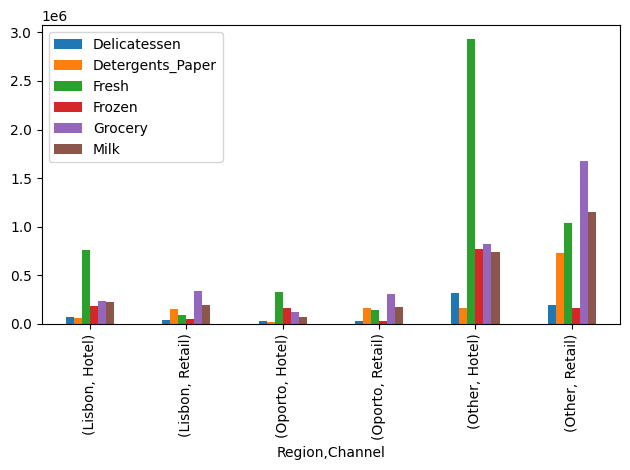

In [21]:
plt.figure(figsize=(15,5))
df_pivot.plot(kind='bar')
plt.tight_layout();

- Fresh category has high spending across all regions and channels.
- Retailers in Lisbon and Oporto spend more on Grocery items compared to hotels.
- Hotels in the Other region have significantly higher spending across all categories.
- Retailers have higher spending on Detergents_Paper compared to hotels.
- Hotels in the Other region spend significantly more on Delicatessen.








1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?


In [22]:
df.describe().T

count          mean           std    min       25%      50%  \
Buyer/Spender     440.0    220.500000    127.161315    1.0    110.75    220.5   
Fresh             440.0  12000.297727  12647.328865    3.0   3127.75   8504.0   
Milk              440.0   5796.265909   7380.377175   55.0   1533.00   3627.0   
Grocery           440.0   7951.277273   9503.162829    3.0   2153.00   4755.5   
Frozen            440.0   3071.931818   4854.673333   25.0    742.25   1526.0   
Detergents_Paper  440.0   2881.493182   4767.854448    3.0    256.75    816.5   
Delicatessen      440.0   1524.870455   2820.105937    3.0    408.25    965.5   
total_spend       440.0  30154.204545  24876.108709  829.0  14125.25  24745.5   

                       75%       max  
Buyer/Spender       330.25     440.0  
Fresh             16933.75  112151.0  
Milk               7190.25   73498.0  
Grocery           10655.75   92780.0  
Frozen             3554.25   60869.0  
Detergents_Paper   3922.00   40827.0  
Delicatessen       1820.25   47943.0  
total_spend       37196.75  198865.0

- From the Range, standard deviation, we are unable to identify much due to presence of outliers. Let's try using IQR/Median here

In [23]:
df1= df.drop(['Buyer/Spender','total_spend'], axis =1).describe().T


In [24]:
df1

count          mean           std   min      25%     50%  \
Fresh             440.0  12000.297727  12647.328865   3.0  3127.75  8504.0   
Milk              440.0   5796.265909   7380.377175  55.0  1533.00  3627.0   
Grocery           440.0   7951.277273   9503.162829   3.0  2153.00  4755.5   
Frozen            440.0   3071.931818   4854.673333  25.0   742.25  1526.0   
Detergents_Paper  440.0   2881.493182   4767.854448   3.0   256.75   816.5   
Delicatessen      440.0   1524.870455   2820.105937   3.0   408.25   965.5   

                       75%       max  
Fresh             16933.75  112151.0  
Milk               7190.25   73498.0  
Grocery           10655.75   92780.0  
Frozen             3554.25   60869.0  
Detergents_Paper   3922.00   40827.0  
Delicatessen       1820.25   47943.0

In [25]:
#Creating new columns for IQR/Median
df1['IQR/median'] = (df1['75%']-df1['25%']) / df1['50%']

In [26]:
df1

count          mean           std   min      25%     50%  \
Fresh             440.0  12000.297727  12647.328865   3.0  3127.75  8504.0   
Milk              440.0   5796.265909   7380.377175  55.0  1533.00  3627.0   
Grocery           440.0   7951.277273   9503.162829   3.0  2153.00  4755.5   
Frozen            440.0   3071.931818   4854.673333  25.0   742.25  1526.0   
Detergents_Paper  440.0   2881.493182   4767.854448   3.0   256.75   816.5   
Delicatessen      440.0   1524.870455   2820.105937   3.0   408.25   965.5   

                       75%       max  IQR/median  
Fresh             16933.75  112151.0    1.623471  
Milk               7190.25   73498.0    1.559760  
Grocery           10655.75   92780.0    1.787982  
Frozen             3554.25   60869.0    1.842726  
Detergents_Paper   3922.00   40827.0    4.488977  
Delicatessen       1820.25   47943.0    1.462455

- The item Detergents_Paper exhibits the highest level of inconsistency, with a relatively high IQR/median value of 4.488977.
-  Delicatessen and Milk show the least inconsistency, with lower IQR/median values of 1.462455 and 1.559760 respectively.
-  Higher IQR/median values indicate greater variability and inconsistency in the data, while lower values suggest more consistency and less spread.



1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.


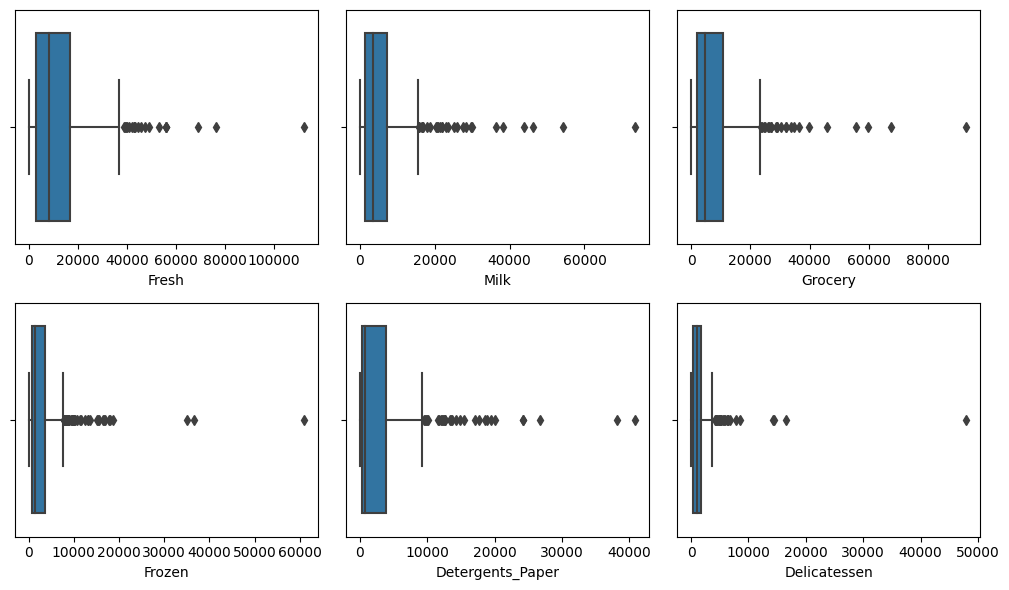

In [27]:
plt.figure(figsize=(10,6))
plt.subplot(2, 3, 1)
sns.boxplot(data=df, x='Fresh')

plt.subplot(2, 3, 2)
sns.boxplot(data=df, x= 'Milk')

plt.subplot(2, 3, 3)
sns.boxplot(data=df, x= 'Grocery')

plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='Frozen')

plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='Detergents_Paper')

plt.subplot(2, 3, 6)
sns.boxplot(data=df, x='Delicatessen')
plt.tight_layout();

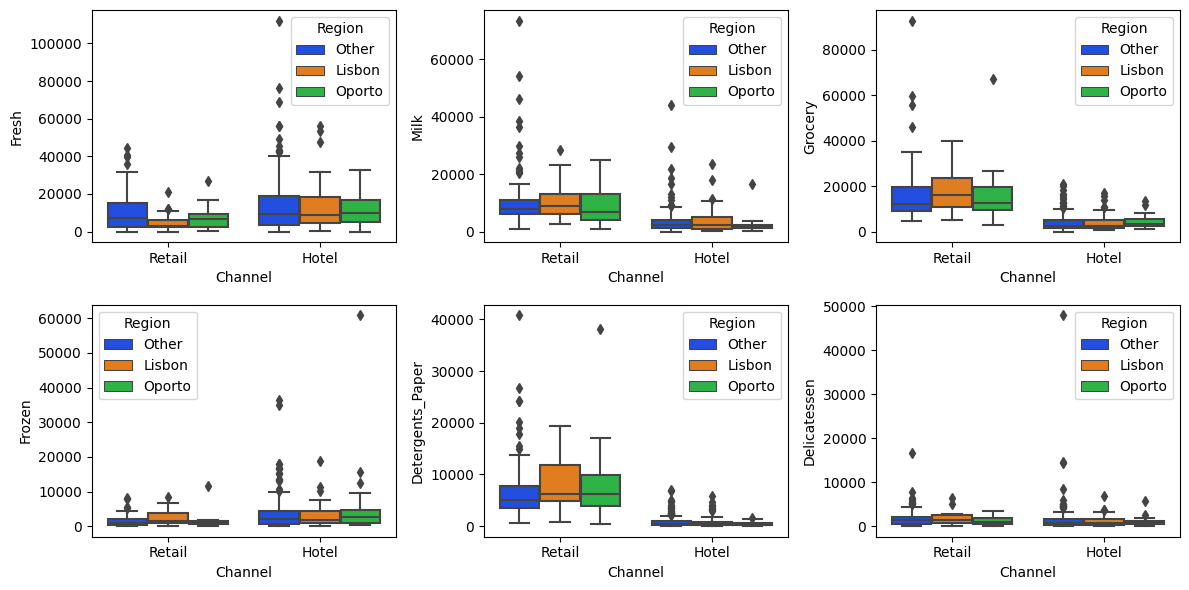

In [28]:
plt.figure(figsize=(12, 6))

# Fresh
plt.subplot(2, 3, 1)
sns.boxplot(data=df, x="Channel", y="Fresh", hue="Region", palette='bright')

# Milk
plt.subplot(2, 3, 2)
sns.boxplot(data=df, x="Channel", y="Milk", hue="Region", palette='bright')

# Grocery
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x="Channel", y="Grocery", hue="Region", palette='bright')

# Frozen
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x="Channel", y="Frozen", hue="Region", palette='bright')

# Detergents_Paper
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x="Channel", y="Detergents_Paper", hue="Region", palette='bright')

# Delicatessen
plt.subplot(2, 3, 6)
sns.boxplot(data=df, x="Channel", y="Delicatessen", hue="Region", palette='bright')

plt.tight_layout()


We can see Outliers are present in all the categories



1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective.

- Retailers spend more than hotels. This means that we can increase our revenue by targeting more retailers. We can do this by expanding our reach to new retailers or by increasing our marketing efforts to existing retailers.
- There are customers in other regions. Currently, we are only focused on Oporto and Lisbon. However, there are customers in other regions as well. We should focus on expanding our reach to these regions.
- Hotels buy fresh food, retailers buy grocery & milk. This means that we can maximize our sales by focusing on these items in each channel. For example, we can offer discounts on fresh food to hotels or we can offer loyalty programs for grocery & milk purchases to retailers.
- Frozen foods, delicatessen & detergents_paper are least popular. This means that we may not be able to sell these items as well in the current channels. We can look for other channels or industries that have demand for these items. For example, we could sell frozen foods to restaurants or delicatessen items to grocery stores.

#Problem 2

The dataset Education - Post 12th Standard.csv contains information on various colleges. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

Data Dictionary
- Names: Names of various university and colleges
- Apps: Number of applications received
- Accept: Number of applications accepted
- Enroll: Number of new students enrolled
- Top10perc: Percentage of new students from top 10% of Higher Secondary class
- Top25perc: Percentage of new students from top 25% of Higher Secondary class
- F.Undergrad: Number of full-time undergraduate students
- P.Undergrad: Number of part-time undergraduate students
- Outstate: Number of students for whom the particular college or university is Out-of-state tuition
- Room.Board: Cost of Room and board
- Books: Estimated book costs for a student
- Personal: Estimated personal spending for a student
- PhD: Percentage of faculties with Ph.D.’s
- Terminal: Percentage of faculties with terminal degree
- S.F.Ratio: Student/faculty ratio
- perc.alumni: Percentage of alumni who donate
- Expend: The Instructional expenditure per student
- Grad.Rate: Graduation rate




In [29]:
#Loading the dataset in dataframe df
ed = pd.read_csv('Education - Post 12th Standard.csv')

In [30]:
#Dimentions of the dataset
ed.shape

(777, 18)

In [31]:
#Checking first & last 5 rows of the dataset
ed

Names   Apps  Accept  Enroll  Top10perc  \
0      Abilene Christian University   1660    1232     721         23   
1                Adelphi University   2186    1924     512         16   
2                    Adrian College   1428    1097     336         22   
3               Agnes Scott College    417     349     137         60   
4         Alaska Pacific University    193     146      55         16   
..                              ...    ...     ...     ...        ...   
772         Worcester State College   2197    1515     543          4   
773               Xavier University   1959    1805     695         24   
774  Xavier University of Louisiana   2097    1915     695         34   
775                 Yale University  10705    2453    1317         95   
776    York College of Pennsylvania   2989    1855     691         28   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
0           52         2885          537      7440        3300    450   
1           29         2683         1227     12280        6450    750   
2           50         1036           99     11250        3750    400   
3           89          510           63     12960        5450    450   
4           44          249          869      7560        4120    800   
..         ...          ...          ...       ...         ...    ...   
772         26         3089         2029      6797        3900    500   
773         47         2849         1107     11520        4960    600   
774         61         2793          166      6900        4200    617   
775         99         5217           83     19840        6510    630   
776         63         2988         1726      4990        3560    500   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        2200   70        78       18.1           12    7041         60  
1        1500   29        30       12.2           16   10527         56  
2        1165   53        66       12.9           30    8735         54  
3         875   92        97        7.7           37   19016         59  
4        1500   76        72       11.9            2   10922         15  
..        ...  ...       ...        ...          ...     ...        ...  
772      1200   60        60       21.0           14    4469         40  
773      1250   73        75       13.3           31    9189         83  
774       781   67        75       14.4           20    8323         49  
775      2115   96        96        5.8           49   40386         99  
776      1250   75        75       18.1           28    4509         99  

[777 rows x 18 columns]

The dataset has 777 rows & 18 columns

In [32]:
ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

- The dataset contains information on 777 educational institutions.
- It consists of 18 columns representing various aspects of these institutions.
- The data is complete, with no missing values.
- The dataset provides insights into applications, acceptance, enrollment, student performance, expenses, faculty qualifications, and more.






2.1 Perform Exploratory Data Analysis [Univariate, Bivariate, and Multivariate analysis to be performed]. What insight do you draw from the EDA?


In [33]:
#Checking null values
ed.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

- There are no null values

In [34]:
#Checking duplicate values
ed.duplicated().sum()

0

- There are no duplicate values

In [35]:
#Data summary
ed.describe(include='all').T

count unique                           top freq          mean  \
Names          777    777  Abilene Christian University    1           NaN   
Apps         777.0    NaN                           NaN  NaN   3001.638353   
Accept       777.0    NaN                           NaN  NaN   2018.804376   
Enroll       777.0    NaN                           NaN  NaN    779.972973   
Top10perc    777.0    NaN                           NaN  NaN     27.558559   
Top25perc    777.0    NaN                           NaN  NaN     55.796654   
F.Undergrad  777.0    NaN                           NaN  NaN   3699.907336   
P.Undergrad  777.0    NaN                           NaN  NaN    855.298584   
Outstate     777.0    NaN                           NaN  NaN  10440.669241   
Room.Board   777.0    NaN                           NaN  NaN   4357.526384   
Books        777.0    NaN                           NaN  NaN    549.380952   
Personal     777.0    NaN                           NaN  NaN   1340.642214   
PhD          777.0    NaN                           NaN  NaN     72.660232   
Terminal     777.0    NaN                           NaN  NaN     79.702703   
S.F.Ratio    777.0    NaN                           NaN  NaN     14.089704   
perc.alumni  777.0    NaN                           NaN  NaN     22.743887   
Expend       777.0    NaN                           NaN  NaN   9660.171171   
Grad.Rate    777.0    NaN                           NaN  NaN      65.46332   

                     std     min     25%     50%      75%      max  
Names                NaN     NaN     NaN     NaN      NaN      NaN  
Apps         3870.201484    81.0   776.0  1558.0   3624.0  48094.0  
Accept       2451.113971    72.0   604.0  1110.0   2424.0  26330.0  
Enroll         929.17619    35.0   242.0   434.0    902.0   6392.0  
Top10perc      17.640364     1.0    15.0    23.0     35.0     96.0  
Top25perc      19.804778     9.0    41.0    54.0     69.0    100.0  
F.Undergrad  4850.420531   139.0   992.0  1707.0   4005.0  31643.0  
P.Undergrad  1522.431887     1.0    95.0   353.0    967.0  21836.0  
Outstate     4023.016484  2340.0  7320.0  9990.0  12925.0  21700.0  
Room.Board   1096.696416  1780.0  3597.0  4200.0   5050.0   8124.0  
Books          165.10536    96.0   470.0   500.0    600.0   2340.0  
Personal      677.071454   250.0   850.0  1200.0   1700.0   6800.0  
PhD            16.328155     8.0    62.0    75.0     85.0    103.0  
Terminal       14.722359    24.0    71.0    82.0     92.0    100.0  
S.F.Ratio       3.958349     2.5    11.5    13.6     16.5     39.8  
perc.alumni    12.391801     0.0    13.0    21.0     31.0     64.0  
Expend        5221.76844  3186.0  6751.0  8377.0  10830.0  56233.0  
Grad.Rate       17.17771    10.0    53.0    65.0     78.0    118.0

- The dataset contains information on 777 educational institutions, providing a comprehensive view of the higher education landscape.
- The average number of applications received by institutions is around 3001, indicating a competitive admissions process.
- The mean student-to-faculty ratio is approximately 14, suggesting a relatively balanced student-teacher interaction in these institutions.
- The average graduation rate across the institutions is approximately 65%, reflecting the percentage of students who successfully complete their degree programs.
- The average instructional expenditure per student is around $9660, indicating the financial resources allocated to supporting education and academic programs in these institutions.


###Univariate Analysis

In [36]:
columns = ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad',
           'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio',
           'perc.alumni', 'Expend', 'Grad.Rate']


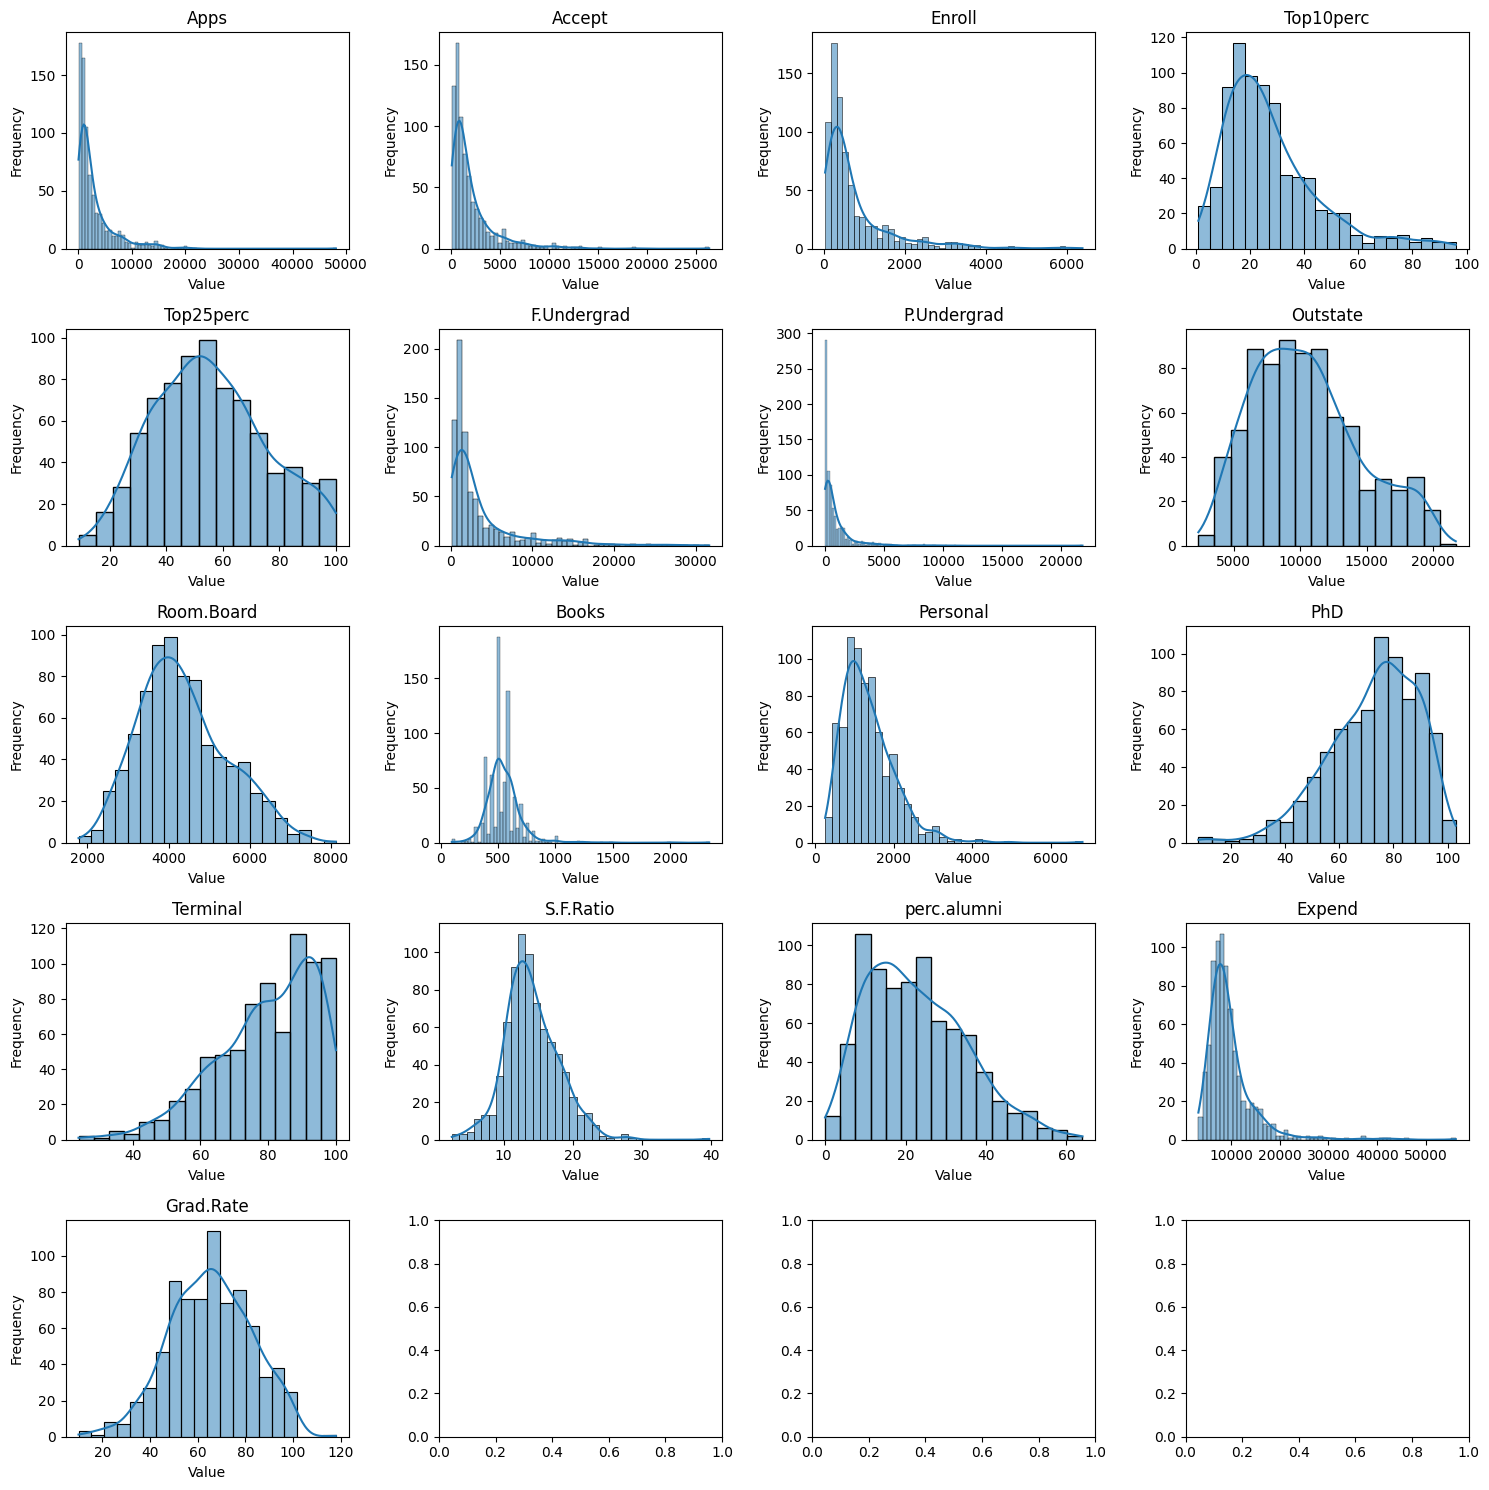

In [37]:
# Creating subplots
num_rows = 5
num_cols = 4
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axs = axs.flatten()

for i, column in enumerate(columns):
    sns.histplot(ed[column],kde=True,ax=axs[i])
    axs[i].set_title(column)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()


### Bivariate analysis

<Axes: xlabel='Apps', ylabel='Accept'>

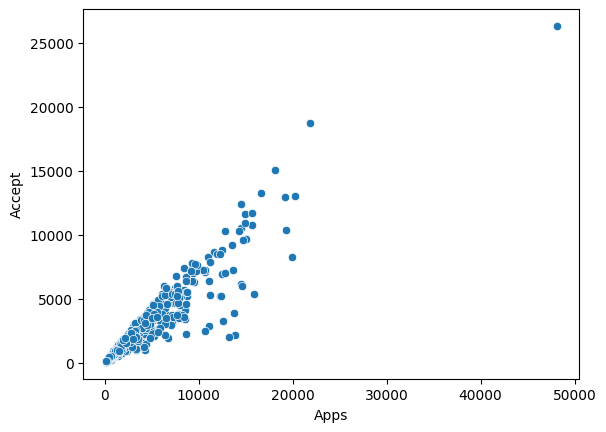

In [38]:
sns.scatterplot(data=ed, x='Apps', y='Accept')

<Axes: xlabel='Apps', ylabel='Enroll'>

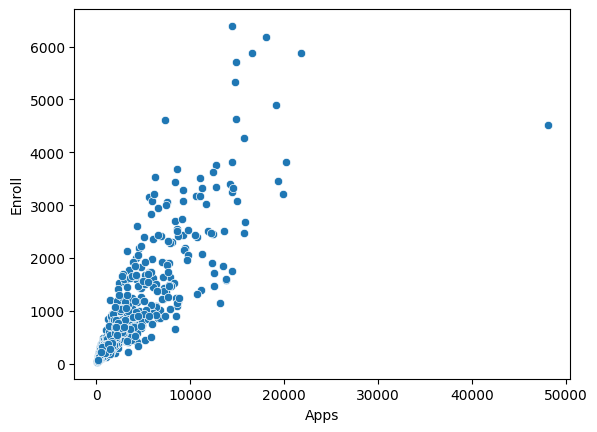

In [39]:
sns.scatterplot(data=ed, x='Apps', y='Enroll')

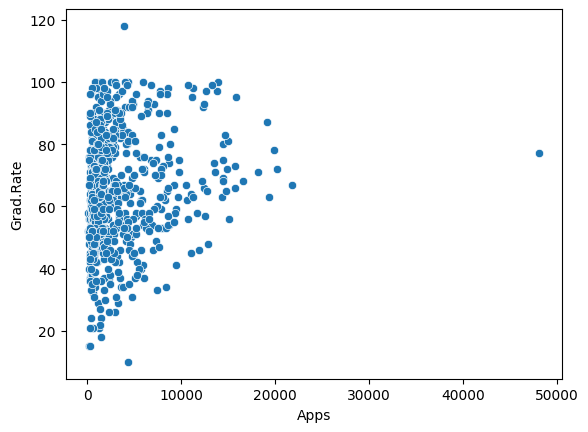

In [40]:
sns.scatterplot(data=ed, x='Apps', y='Grad.Rate');

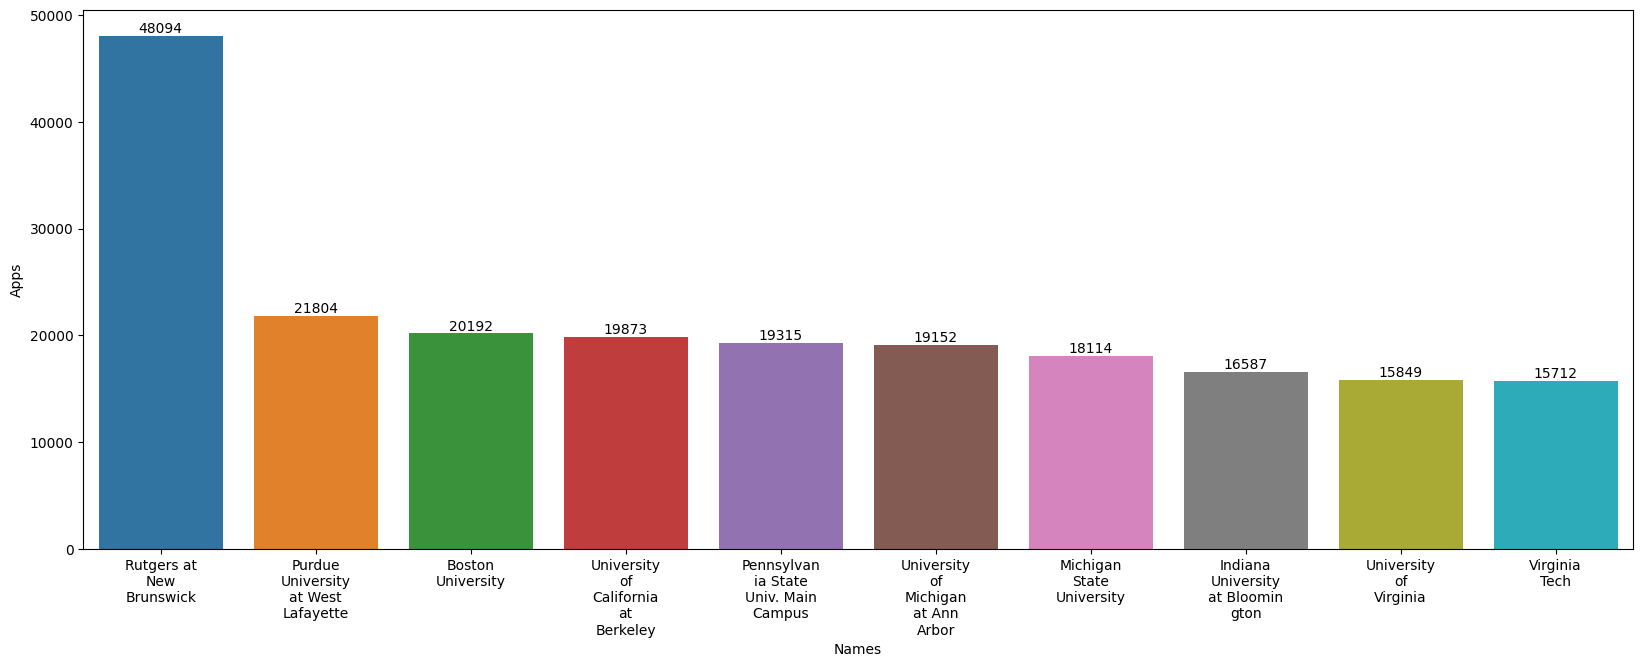

In [41]:
#Top 10 Colleges with highest Application
import textwrap

plt.figure(figsize=(20, 7))
data = ed.sort_values(by='Apps', ascending=False).head(10)
ex = sns.barplot(data=data, x='Names', y='Apps')
for label in ex.containers:
    ex.bar_label(label)

tick_locs = range(len(data))
tick_labels = [textwrap.fill(name, 10) for name in data['Names']]
plt.xticks(ticks=tick_locs, labels=tick_labels);

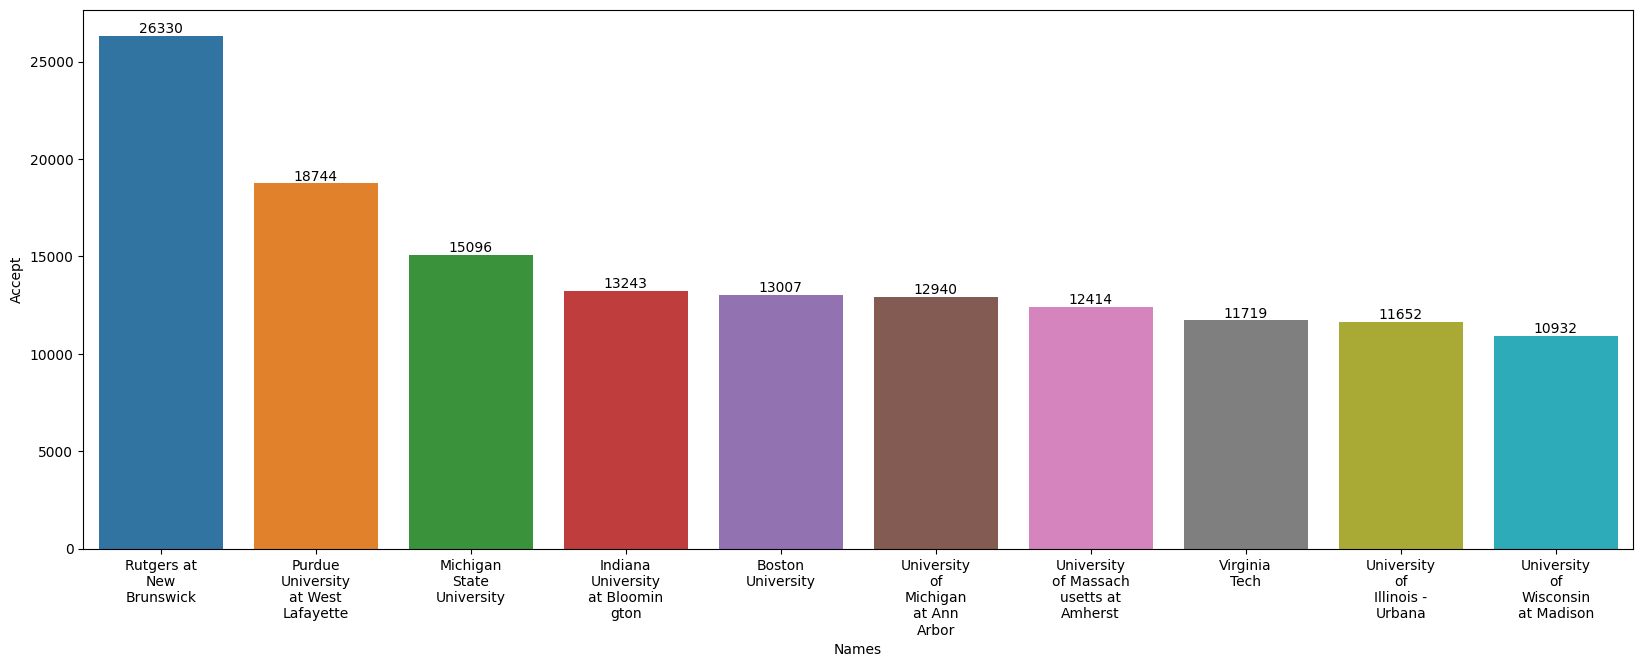

In [42]:
# 10 Colleges with Least Application

plt.figure(figsize=(20, 7))
data = ed.sort_values(by='Accept', ascending=False).head(10)
ex1 = sns.barplot(data=data, x='Names', y='Accept')
for label in ex1.containers:
    ex1.bar_label(label)

tick_locs = range(len(data))
tick_labels = [textwrap.fill(name, 10) for name in data['Names']]
plt.xticks(ticks=tick_locs, labels=tick_labels);

In [43]:
ed.head(1)

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60

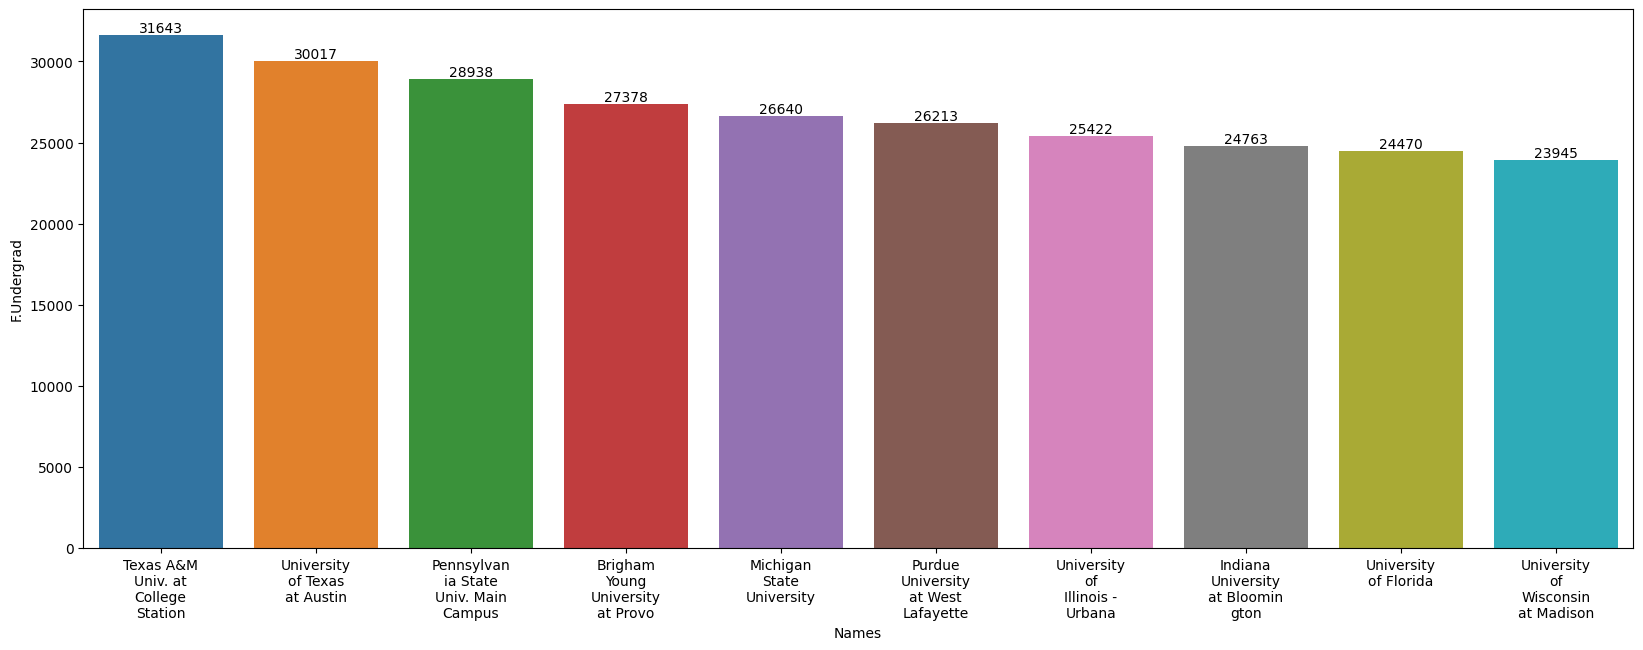

In [44]:
#Top 10 Colleges with highest F.Undergrad

plt.figure(figsize=(20, 7))
data = ed.sort_values(by='F.Undergrad', ascending=False).head(10)
ex2 = sns.barplot(data=data, x='Names', y='F.Undergrad')
for label in ex2.containers:
    ex2.bar_label(label)

tick_locs = range(len(data))
tick_labels = [textwrap.fill(name, 10) for name in data['Names']]
plt.xticks(ticks=tick_locs, labels=tick_labels);


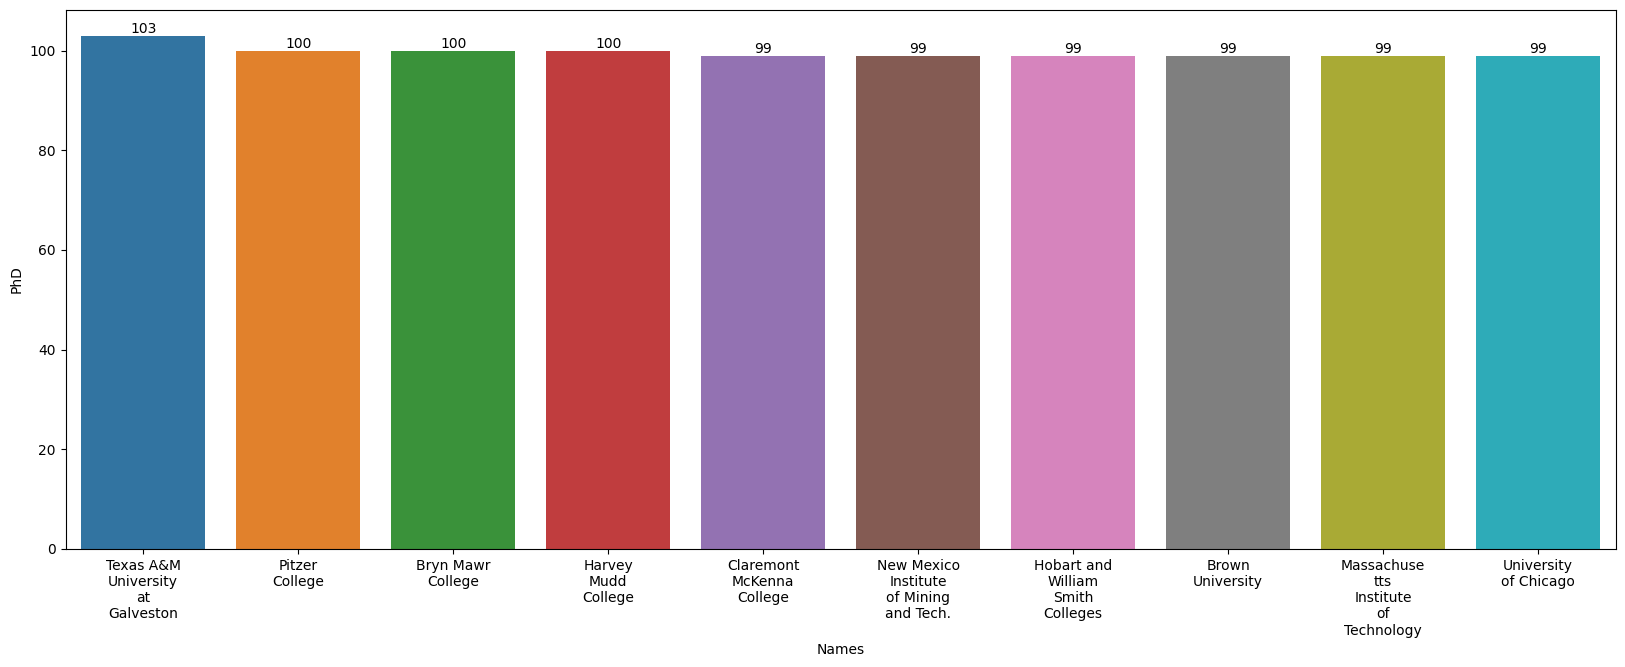

In [45]:
#Top 10 Colleges with highest PhD

plt.figure(figsize=(20, 7))
data = ed.sort_values(by='PhD', ascending=False).head(10)
ex2 = sns.barplot(data=data, x='Names', y='PhD')
for label in ex2.containers:
    ex2.bar_label(label)

tick_locs = range(len(data))
tick_labels = [textwrap.fill(name, 10) for name in data['Names']]
plt.xticks(ticks=tick_locs, labels=tick_labels);


###Multivariate analysis

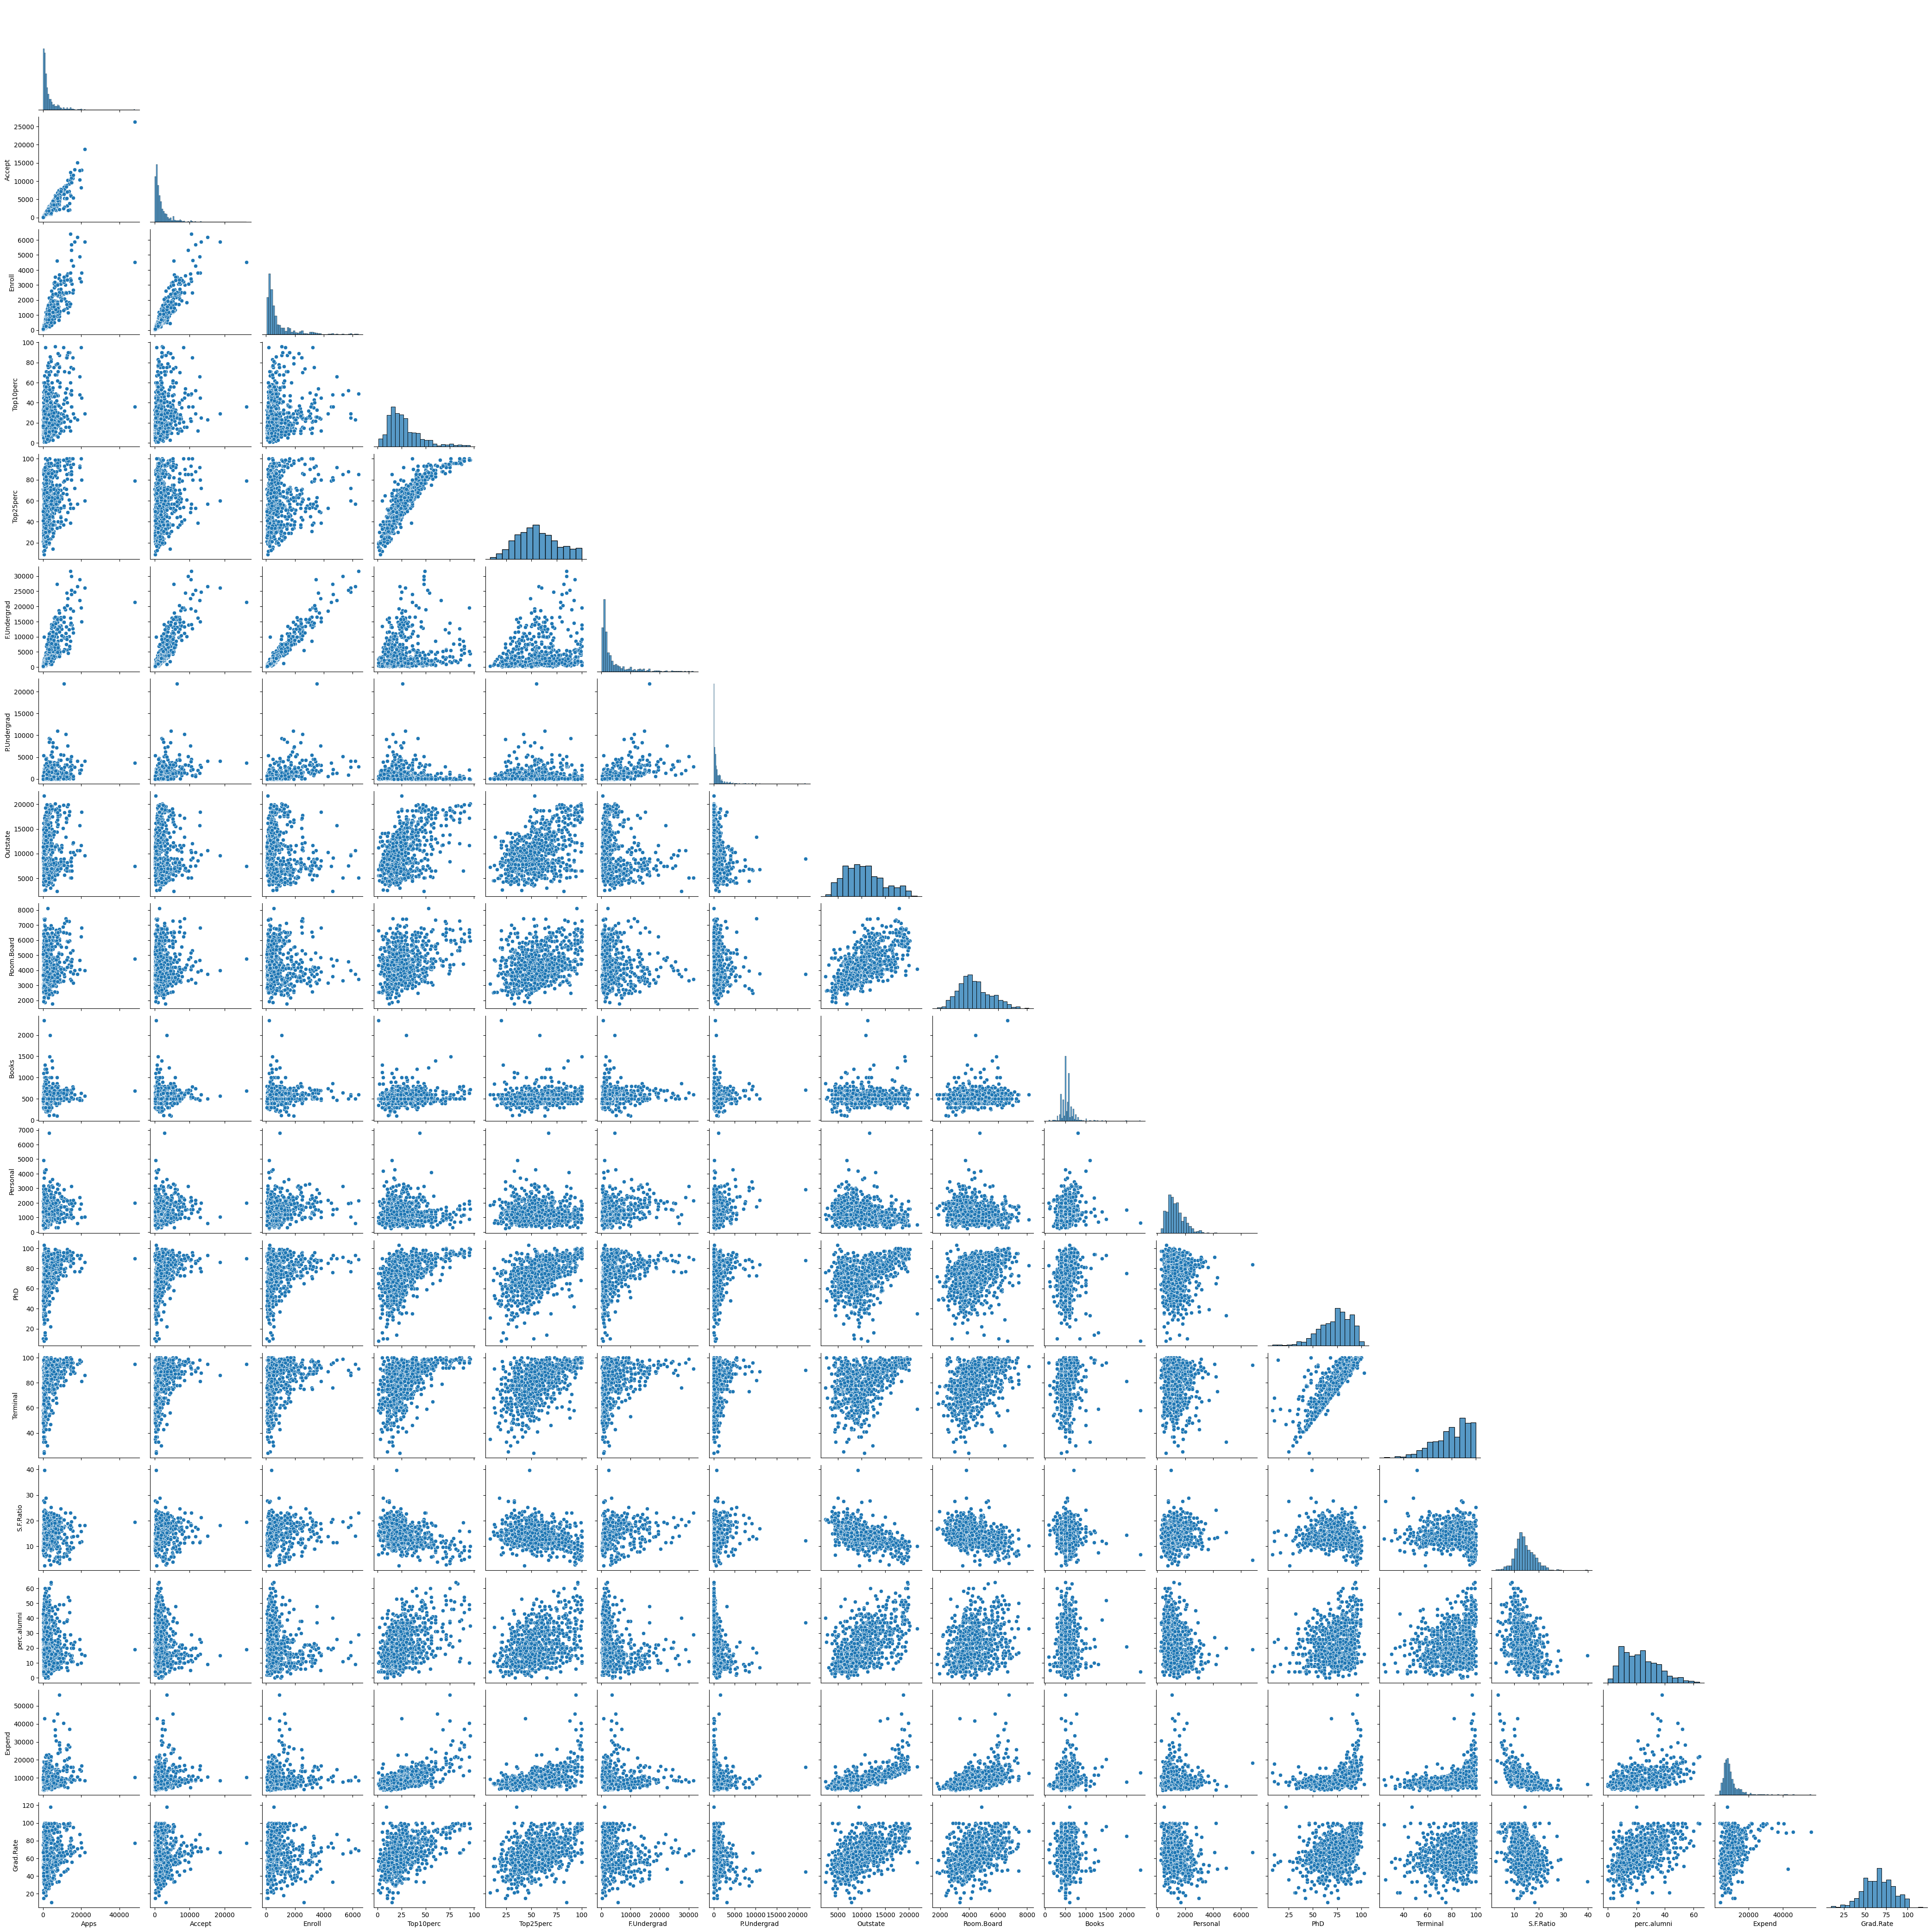

In [46]:
#Pairplot
sns.pairplot(ed, corner=True);

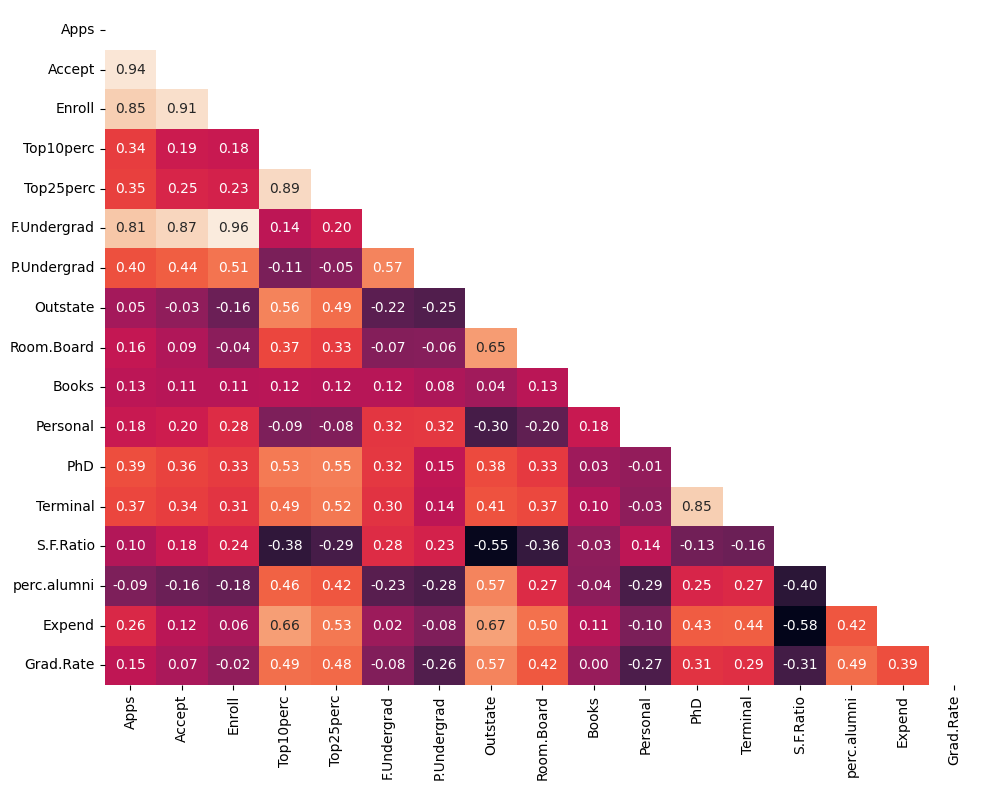

In [47]:
#Heatmap
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(ed.corr()))
sns.heatmap(data=ed.corr(), annot=True,fmt='.2f', mask=mask,cbar=False )
plt.tight_layout()

**Basis the Multivariate Analysis above, we can infer that:-**


- There is a strong positive correlation between the number of applications, acceptances, and enrollments.
- The presence of top-performing students is associated with higher values in various variables.
- Higher student-to-faculty ratios are linked to lower out-of-state tuition, room and board expenses, expenditure per student, and graduation rates.
- Institutions with a higher percentage of faculty holding PhD and terminal degrees tend to have a strong positive correlation.
- Higher instructional expenditures per student are associated with increased out-of-state tuition, room and board expenses, spending on books, personal expenses, faculty with advanced degrees, and graduation rates.

Checking for Outliers

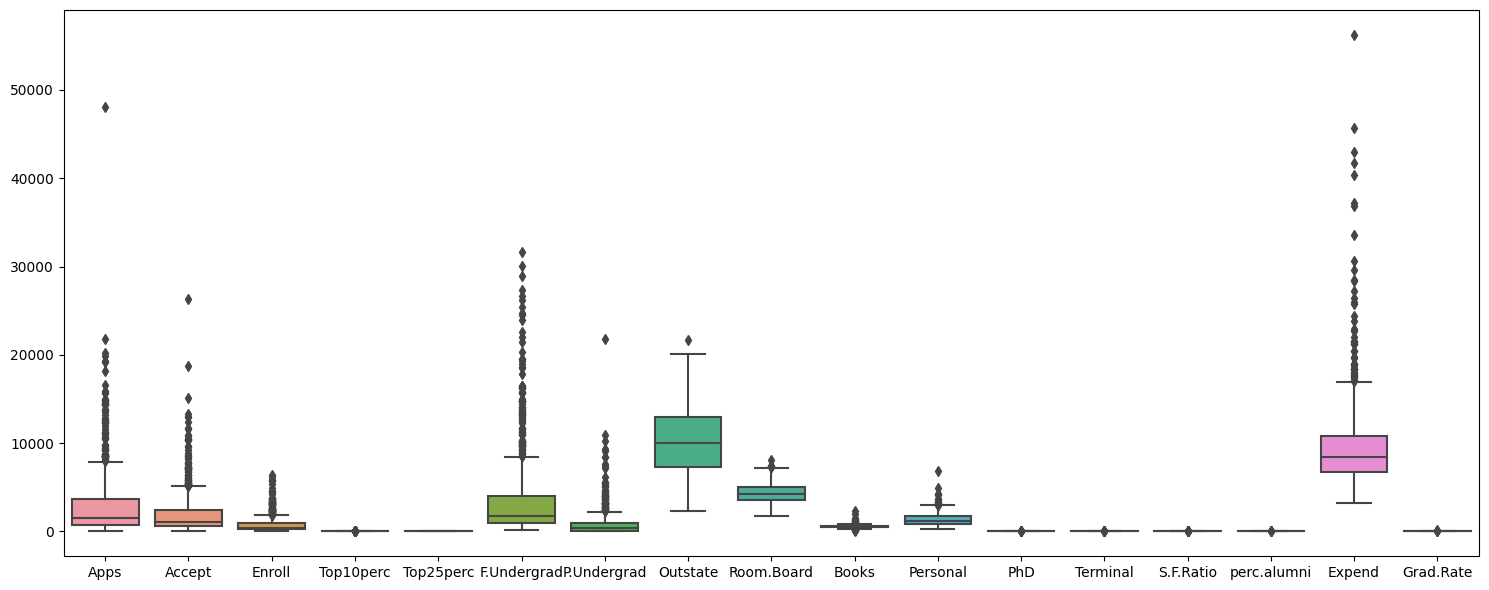

In [48]:
plt.figure(figsize=(15,6))
sns.boxplot(ed)
plt.tight_layout()

<Axes: xlabel='Top25perc'>

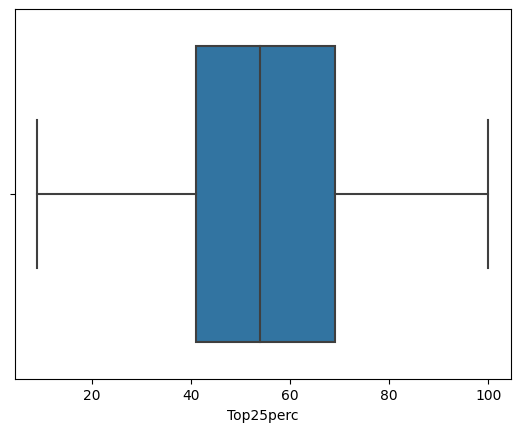

In [49]:
sns.boxplot(data=ed, x='Top25perc')


- Except for Top25perc, all the values has outlier present

##**Overall Insights:**
- The dataset provides insights into applications, acceptance, enrollment, student performance, expenses, and faculty qualifications among 777 educational institutions.
- The dataset is complete, with no missing values and no duplicate values.
- The average number of applications received by institutions is around 3001, indicating a competitive admissions process.
- The mean student-to-faculty ratio is approximately 14, suggesting a balanced student-teacher interaction.
- The average graduation rate across institutions is around 65%, reflecting successful degree program completion.
- The average instructional expenditure per student is approximately $9660, indicating the allocation of financial resources to support education.
- Most variables follow a relatively normal distribution with some skewness.
- The analysis shows a strong positive correlation between applications, acceptances, and enrollments.
- Higher student-to-faculty ratios are linked to lower tuition, room and board expenses, expenditure per student, and graduation rates.
- Institutions with a higher percentage of faculty holding PhD and terminal degrees have a strong positive correlation.
- Higher instructional expenditures per student are associated with increased tuition, room and board expenses, spending on books, personal expenses, faculty with advanced degrees, and graduation rates.
- Outliers are present in all variables except for Top25per.
